# 2667 단지번호붙이기 ★
다른 블로그 참조 : O

reference : https://hongcoding.tistory.com/71

### Q)
<그림 1>과 같이 정사각형 모양의 지도가 있다. 1은 집이 있는 곳을, 0은 집이 없는 곳을 나타낸다. 철수는 이 지도를 가지고 연결된 집의 모임인 단지를 정의하고, 단지에 번호를 붙이려 한다. 여기서 연결되었다는 것은 어떤 집이 좌우, 혹은 아래위로 다른 집이 있는 경우를 말한다. 대각선상에 집이 있는 경우는 연결된 것이 아니다. <그림 2>는 <그림 1>을 단지별로 번호를 붙인 것이다. 지도를 입력하여 단지수를 출력하고, 각 단지에 속하는 집의 수를 오름차순으로 정렬하여 출력하는 프로그램을 작성하시오.

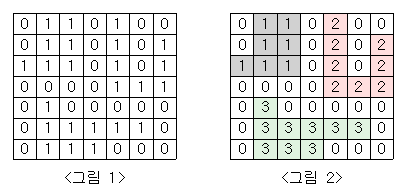

### Input)
첫 번째 줄에는 지도의 크기 N(정사각형이므로 가로와 세로의 크기는 같으며 5≤N≤25)이 입력되고, 그 다음 N줄에는 각각 N개의 자료(0혹은 1)가 입력된다.

### Output)
첫 번째 줄에는 총 단지수를 출력하시오. 그리고 각 단지내 집의 수를 오름차순으로 정렬하여 한 줄에 하나씩 출력하시오.

### Source Code)

#### BFS 사용

In [ ]:
from sys import stdin
input = stdin.readline

N = int(input())

dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

def BFS(graph, a, b):
    queue = []
    queue.append((a, b))
    graph[a][b] = 0
    count = 1

    while queue:
        x, y = queue.pop(0)
        for i in range(4):
            now_x = x + dx[i]
            now_y = y + dy[i]
            if now_x < 0 or now_x >= N or now_y < 0 or now_y >= N:
                continue
            if graph[now_x][now_y] == 1:
                graph[now_x][now_y] = 0
                queue.append((now_x, now_y))
                count += 1

    return count

graph = []
for i in range(N):
    graph.append(list(map(int, input().strip())))

result = []
for i in range(N):
    for j in range(N):
        if graph[i][j] == 1:
            result.append(BFS(graph, i, j))

result.sort()
print(len(result))
print(*result, sep='\n')

#### DFS 사용

In [ ]:
import sys
from sys import stdin
input = stdin.readline
sys.setrecursionlimit(10**9)

N = int(input())
graph = []
result = []

dx = [0, 0, 1, -1]
dy = [1, -1, 0, 0]

for _ in range(N):
    graph.append(list(map(int, input().strip())))

def DFS(a, b):
    global count
    if a < 0 or a >= N or b < 0 or b >= N:
        return False

    if graph[a][b] == 1:
        count += 1
        graph[a][b] = 0
        for i in range(4):
            now_x = a + dx[i]
            now_y = b + dy[i]
            DFS(now_x, now_y)
        return True
    return False

for i in range(N):
    for j in range(N):
        count = 0
        if DFS(i,j) == True:
            result.append(count)

result.sort()
print(len(result))
print(*result, sep='\n')

문제를 너무 어렵게 생각하지 말자.

BFS, DFS 모두 알고리즘만 알면 쉽게 해결할 수 있다.

1. BFS
    그래프의 탐색 시작점을 모르기 때문에 전체를 돌면서 1인 지점에서 탐색을 시작해야함.
    탐색 중 1인 부분은 0으로 바꿔 다시 방문하지 않도록 함.
    -> 반복문을 통해 해결

2. DFS
    큐 대신 재귀를 사용하는데 마찬가지로 시작점을 모르기 때문에 전체를 돌면서 1인 지점에서 탐색을 해야함
    recursion임을 꼭 기억하고 조건을 달아줘야 함